# **Initialize**

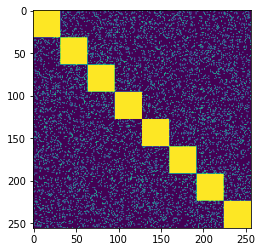

In [1]:
from numpy.ma.core import sqrt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy.random import *
import math
import random
from math import pi
import copy
import scipy

#Parameters
N = 8
m = 32
total = N*m
q = 1/8
a = 0.6
b = 0.4
omega = 1
kappa = 64
dt = 0.05#0.05
time_step = 10**2 #5 * 10**6
t_max = (time_step - 1) * dt
gamma = 0.8

def prob_no_connection(q):
    prob = random.randint(1, 1/q)
    if prob != 1:
        return 0
    return 1

# Initial Network
NW = np.array( [ [0.0] * total ] * total )
for i in range(total):
    for j in range(total):
        NW[i][j] = prob_no_connection(q) * b
        if int( i / m ) == int( j / m ) : NW[i][j] = a
for i in range(total):
    for j in range(i,total):
        NW[i][j] = NW[j][i]
plt.imshow(NW)
# Initial phi's uniform distribution　（初期値θは一様分布）
theta = np.random.random_sample(total)*2*pi 
# Initial phi's uniform distribution　（初期値dθは標準正規分布）
dtheta= [0]*(total)
for i in range(total):
    dtheta[i] = random.normalvariate(0,1)

There is a way to find feature of Chaotic trajectory

https://aip.scitation.org/doi/pdf/10.1063/5.0063384

$$
\dot{\theta_i} = \omega + \frac{1}{\kappa} \sum^{}_{j=1} K(i,j) sin(\theta_j - \theta_i - \alpha)
$$

$$
K_{ij} = 
    \begin{cases}
        {a \ \ \ \ \rm{if \ i \ and\ j\ are\ in\ the\ same\ community\ or}}\\
        {b \ \ \ \  \rm{otherwise}}
\end{cases}
$$


> We simulated a network composed of N = 8 communities of
m = 32 oscillators each. The probability of connections across communities was set to q = 1/8, with connection strengths of a = 0.6
within communities and b = 0.4 across. The natural frequency used
was ω = 1 and the normalization constant κ = 64. We ran 1500
simulations with values of β distributed uniformly at random in the
range [0, 2π ) using a **4th-order Runge–Kutta algorithm**, using a step
size of 0.05 for numerical integration. Each simulation was run for
$5 × 10^6$
time steps, discarding the first 104
to avoid transient effects
and applying a thinning factor of 5. For the results presented here,
we used γ = 0.8, and we confirmed that results were qualitatively
stable for a wide range of threshold values. All information-theoretic
measures are reported in bits.

In [2]:
def K( i , j ):
    i_gr = int( i / 8 )
    j_gr = int( j / 8 )
    res = a
    if i_gr != j_gr :
        res = b
    return res 

def fun(i,theta,alpha):
    thetadot = omega
    for j in range(total):
        #thetadot += K( i , j ) * np.sin( theta[ j ] - theta[ i ] - alpha ) * NW[i][j]
        thetadot += np.sin( theta[ j ] - theta[ i ] - alpha ) * NW[i][j]
    return thetadot

In [3]:
def calc_coupl(x,x_b,alpha):
    for i in range(total):
        x[i] = fun(i,x_b,alpha)

def RungeKutta(alpha):
    t = 0.0
    dtheta_hist = []
    theta_hist = []
    t_hist = []

    x = np.random.random_sample(total)*(2*pi) 
    x_b = np.empty(total)
    x_temp = np.empty(total)
    x_b1 = np.empty(total)
    x_b2 = np.empty(total)
    x_b3 = np.empty(total)
    x_b4 = np.empty(total)

    for i in range(total):
        x_b[i] = x[i]

    step = 0
    while step < time_step : 
        step += 1
        #if step%10 == 0 : print(t)
        for i in range(total):
            x_b[i]=x[i]
        
        calc_coupl(x_b1,x_b,alpha)

        for i in range(total):
            x_temp[i] = x_b1[i] * 0.5*dt + x_b[i]
            
        calc_coupl(x_b2,x_temp,alpha)
            
        for i in range(total):
            x_temp[i]=x_b2[i] * 0.5*dt + x_b[i]
                
        calc_coupl(x_b3,x_temp,alpha)
                
        for i in range(total):
            x_temp[i] = x_b3[i]*dt + x_b[i]
        
        calc_coupl(x_b4,x_temp,alpha)
        
        for i in range(total):
            x[i] = x_b[i] + (x_b1[i]+2*x_b2[i]+2*x_b3[i]+x_b4[i])*dt/6.0
            x[i] = x[i] % (2.0*pi)
        
        #print(x)
        tmp = copy.copy(x)
        dtheta_hist.append(tmp)
        tmp = copy.copy(x_b)
        theta_hist.append(tmp)
        t_hist.append(t)

        t+=dt

    return np.array(dtheta_hist), np.array(theta_hist), np.array(t_hist)

In [4]:
def Euler(theta,dtheta,alpha):
    theta_hist = []
    dtheta_hist = []
    t_hist = []

    t = 0.0 ; step = 0
    while step < time_step : 
        t += dt ; step += 1
        dtheta = [0 for _ in range(total)]
        for i in range(total):
            dtheta[i] = fun(i,theta,alpha)
            theta[i] += dtheta[i]*dt
            theta[i] = theta[i] % (2*pi)
        
        #記録
        tmp = copy.copy(dtheta)
        dtheta_hist.append(tmp)

        tmp = copy.copy(theta)
        theta_hist.append(tmp)

        t_hist.append(t)

    return dtheta_hist,theta_hist,t_hist

# **RUN SIMULATION**

In [5]:
beta = 0.3
#dtheta_hist,theta_hist,t_hist = Euler(theta,dtheta,pi/2 - beta)
dtheta_hist,theta_hist,t_hist = RungeKutta(pi/2 - beta)

cut  the first few seconds to avoid transient effects and applying a thinning factor of 5.

In [6]:
cuting_frame = 50
theta_hist = theta_hist[cuting_frame:]
t_hist = t_hist[cuting_frame:]

Text(0, 0.5, '$\\theta_2$')

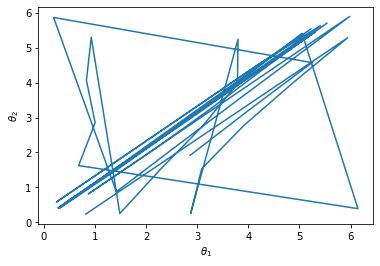

In [7]:
tmp_dtheta_hist = np.array(dtheta_hist)
tmp_theta_hist = np.array(theta_hist)
tmp_t_hist = np.array(t_hist)
plt.plot(tmp_theta_hist[:,4], tmp_theta_hist[:,50])
#plt.plot(tmp_t_hist,tmp_theta_hist[:,3])
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')

$$
R_c(t) = | <e^{i \theta_j(t)}>_{j \in I_c} |
$$

$$
X_t^c = \begin{cases}
        {1 \ \  R_c(t) > \gamma }\\
        {0 \ \ otherwise}
    \end{cases}
$$

In [8]:
import cmath 

def calc_R(theta_hist):
    R = np.array( [ [0.0] * N] * len(theta_hist) )
    for k in range(len(theta_hist)):
        for c in range(N):
            sum = 0.0
            for p in range(m):
                id = m*c + p
                sum += cmath.exp( theta_hist[k][id] * 1j ) 
            R[k][c] = abs( sum ) /m

    return R

def calc_X(R):
    X = np.array( [ [0] * N] * len(theta_hist) )
    for k in range(len(theta_hist)):
        for c in range(N):
            if R[k][c] > gamma :
                X[k][c] = 1
            else :
                X[k][c] = 0
    return X

In [9]:
R = calc_R(theta_hist)
X = calc_X(R)

Text(0.5, 1.0, 'Rc with beta = 0.3')

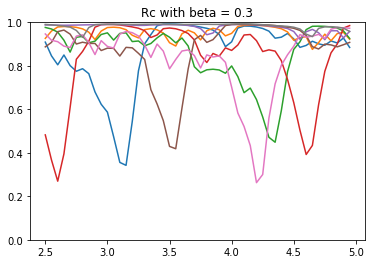

In [10]:
for c in range(N):
    plt.plot( t_hist,R[:,c])
plt.ylim(0,1)
plt.title( "Rc with beta = " +  str(beta))

# **Calculate $\Phi^R$**

$$
\Phi^R[ X ; \tau] = \phi^R[ X ; \tau , B^{MIB}]
$$

$$
\phi^R[ X ; \tau , B^{MIB}] = \phi[ X ; \tau , B] + min_{i,j} I(M^i_{t - \tau} ; M_t^j) 
\\ = I(X_t;X_{t - \tau}) - \Sigma_{j = 1}^{2} I(M^k_{t - \tau} ; M^k_t)  + min_{i,j} I(M^i_{t - \tau} ; M_t^j) 
$$



Calc $I(X_t;X_{t - \tau}) = H( X^t ) - H( X^t | X^{t - \tau} ) $

In [11]:
from scipy.stats import entropy

def prob_distribute(state, n):
    prob_dis = [0] * (2**n)
    for i in range(len(state)):
        prob_dis[state[i]] += 1 / len(state)
    return prob_dis

def make_whole_state(hist,n):
    stnumls = np.array( [0]*len(hist) )
    for i in range(len(hist)):
        stnum = 0
        for j in range(n):
            stnum += 2**j*hist[i][j]
        stnumls[i] = stnum    
    whole_state_pr = prob_distribute(stnumls,n)
    return stnumls , whole_state_pr

# H( Xt | Xt-t )
def calc_cond_ent( whole_state , whole_state_pr , Tau ):
    cond_entropy = 0
    for i in range( len(whole_state_pr) ):
        cond_state_dis = [0] * (len(whole_state_pr))
        for j in range( len(whole_state) - int(Tau/dt) ):
            if whole_state[j] == i :
                #seek state of Tau after
                cond_state_dis[ whole_state[ j + int(Tau/dt) ] ] += 1
        if sum(cond_state_dis) != 0 :
            cond_state_pr = np.array(cond_state_dis) / sum(cond_state_dis)
            cond_entropy += whole_state_pr[i] * entropy(cond_state_pr, base=2)
    return cond_entropy

# I ( X ) = H(X) - H( Xt | Xt-t )
def Calc_Mutual_info( X , Tau ):
    whole_state, whole_state_pr = make_whole_state( X, len(X[0]) )
    Mutual_info = entropy(whole_state_pr,base = 2) - calc_cond_ent(whole_state,whole_state_pr,Tau)
    return Mutual_info

**Calculate $\Sigma_{j = 1}^{2} I(M^k_{t - \tau} ; M^k_t)$**






In [12]:
def calc_cuted_Mutual_info(X,c,Tau):
    M1 = [ [] for i in range(len(X))]
    M2 = [ [] for i in range(len(X))]
    for i in range(len(X)):
        for j in range(len(X[0])):
            if c[j] : M1[i].append(X[i][j]) 
            else :   M2[i].append(X[i][j])
    M1 = np.array(M1) ; M2 = np.array(M2)
    return Calc_Mutual_info(M1,Tau) + Calc_Mutual_info(M2,Tau)

**Find $B^{MIB} = argmin \ \frac{\phi[X;\tau,B]}{K(B)}$ when $K(B) = min\{H(M_1), H(M_2)\}$**

In [13]:
def KH(X,c):
    eps = 10**(-5)
    M1 = [ [] for i in range(len(X))]
    M2 = [ [] for i in range(len(X))]
    for i in range(len(X)):
        for j in range(len(X[0])):
            if c[j] : M1[i].append(X[i][j]) 
            else :   M2[i].append(X[i][j])
    M1 = np.array(M1) ; M2 = np.array(M2)
    _ , M1_whole_st_pr = make_whole_state(M1,len(M1[0]))
    _ , M2_whole_st_pr = make_whole_state(M2,len(M2[0]))
    return max(eps , min ( entropy(M1_whole_st_pr,base = 2) , entropy(M2_whole_st_pr,base = 2) )  )

def find_MIB(X,Tau):
    CUTS = []
    for i in range(2 ** N):
        op = [1] * N
        for j in range(N):
            if ((i >> j) & 1):
                op[N - 1 - j] = 0
        if 1<= op.count(1) and op.count(1) <= 4 : CUTS.append(op)
    
    MIB = []
    min_Mutual = 10**10
    for cut in CUTS:
        tmpM = calc_cuted_Mutual_info(X,cut,Tau) / KH(X,cut)
        if tmpM < min_Mutual :
            min_Mutual = tmpM
            MIB = copy.copy(cut)
    print(MIB)
    return MIB

$
\phi[ X ; \tau , B^{MIB}] = I(X_t;X_{t - \tau}) - \Sigma_{k = 1}^{2} I({M^{MIB}}^k_{t - \tau} ; {M^{MIB}}^k_t)
$

In [14]:
def Calc_phi(X,Tau):
    res = Calc_Mutual_info(X,Tau) - calc_cuted_Mutual_info(X,find_MIB(X,Tau),Tau)
    print(res)
    return res

In [18]:
# Hyper Prameters
Tau = 10
gamma = 0.8
N = 8
m = 32
total = N*m

# time steps 
dt = 0.05#0.05
time_step = 10**3 #5 * 10**6
t_max = (time_step - 1) * dt

#Parameters
q = 1/8
a = 0.6
b = 0.4
omega = 1
kappa = 64

betas = [0.02* i for i in range(0,25)]
phi_hist = []
for beta in betas :
    print("calculating with beta = " + str(beta))
    #dtheta_hist,theta_hist,t_hist = Euler(theta,dtheta,pi/2 - beta)
    dtheta_hist,theta_hist,t_hist = RungeKutta(pi/2 - beta)
    R = calc_R(theta_hist)
    X = calc_X(R)
    phi_hist.append( Calc_phi(X,Tau) )

calculating with beta = 0.0
[1, 1, 1, 1, 0, 0, 0, 0]
0.0
calculating with beta = 0.02
[0, 0, 0, 0, 1, 0, 0, 0]
0.0
calculating with beta = 0.04
[0, 0, 0, 1, 1, 0, 0, 1]
0.36903900918659827
calculating with beta = 0.06
[1, 0, 0, 1, 0, 1, 0, 1]
1.1587572174109924
calculating with beta = 0.08
[1, 0, 0, 1, 1, 1, 0, 0]
2.3973412131735987
calculating with beta = 0.1
[1, 1, 1, 1, 0, 0, 0, 0]
3.438891037631551
calculating with beta = 0.12
[1, 0, 1, 0, 0, 1, 1, 0]
4.020930593839598
calculating with beta = 0.14
[1, 0, 0, 1, 0, 1, 0, 1]
3.8243262712952553
calculating with beta = 0.16
[1, 0, 0, 0, 1, 1, 0, 1]
3.933770135803695
calculating with beta = 0.18
[1, 0, 0, 0, 0, 1, 1, 1]
3.546191433739788
calculating with beta = 0.2
[1, 1, 0, 0, 0, 1, 1, 0]
3.0581746766973152
calculating with beta = 0.22
[1, 0, 0, 0, 1, 1, 1, 0]
2.4893805740670287
calculating with beta = 0.24
[1, 0, 0, 0, 1, 1, 1, 0]
1.7971792522426608
calculating with beta = 0.26
[1, 0, 1, 0, 0, 1, 0, 0]
1.0744192507997599
calculating wi

**For presentation**

[0.0, 0.0, 0.36903900918659827, 1.1587572174109924, 2.3973412131735987, 3.438891037631551, 4.020930593839598, 3.8243262712952553, 3.933770135803695, 3.546191433739788, 3.0581746766973152, 2.4893805740670287, 1.7971792522426608, 1.0744192507997599, 0.8023297531971094, 0.29911639967742, 0.26748642857170224, 0.0482282036533197, -0.004884721524475777, -0.04007865134286326, -0.09197220440923523, -0.11940670720776059, -0.07371841501883414, -0.16190493598853062, -0.0675228352096214]

[0.0, 0.0, 0.36903900918659827, 1.1587572174109924, 2.3973412131735987, 3.438891037631551, 4.020930593839598, 3.8243262712952553, 3.933770135803695, 3.546191433739788, 3.0581746766973152, 2.4893805740670287, 1.7971792522426608, 1.0744192507997599, 0.8023297531971094, 0.29911639967742, 0.26748642857170224, 0.0482282036533197, -0.004884721524475777, -0.04007865134286326, -0.09197220440923523, -0.11940670720776059, -0.07371841501883414, -0.16190493598853062, -0.0675228352096214]


Text(0, 0.5, '$\\Phi[ X ; \\tau , B^{MIB}]$')

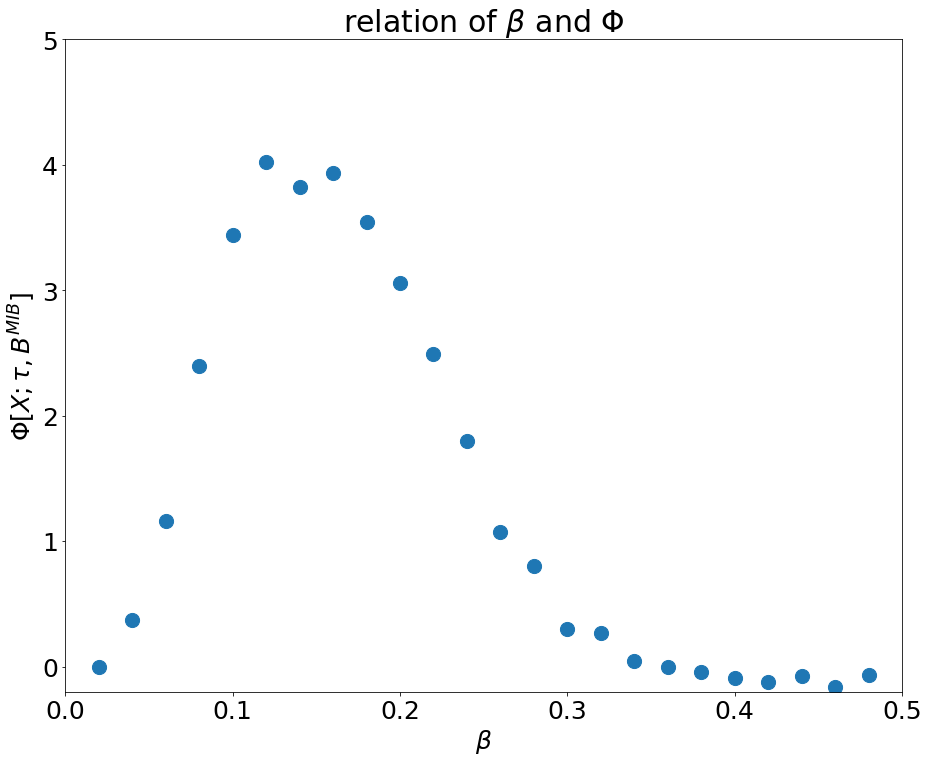

In [23]:
# plot
print(phi_hist)
#整形
plt.figure(figsize=[15,12])
plt.rcParams["font.size"] = 25

plt.scatter(betas[1:],phi_hist[1:],s=200)
#plt.scatter(betas,H_hist)
plt.xlim(0, 0.5)
plt.ylim(-0.2, 5)
plt.title(  "relation of "+ r"$\beta$" + " and "+ r"$\Phi$") #+ " with " + r"$\tau$ = " +  str(Tau)  + r", $\gamma$ = " + str(gamma) )
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\Phi[ X ; \tau , B^{MIB}]$')

In [ ]:
import matplotlib.pyplot as plt
import random

list = [ random.randint(0,255) for _ in range(200)]
plt.xlabel("state")
plt.ylabel("probability")
plt.hist(list,density=True, rwidth=0.9,bins=50)

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

list = [ 1 if random.random() > 0.7 else 0 for _ in range(200000) ]
plt.xlabel("state")
plt.ylabel("probability")
plt.xticks([0, 1])
plt.hist(list,density=True, rwidth=0.9,bins=2)

In [ ]:
import numpy as np
l = np.arange(0,100,10)
print(l)